In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

## Perform API Calls

In [29]:
api_key = weather_api_key
api_key

'e06d3c2d31e7c352533a1df083c566ff'

In [30]:
# OpenWeatherMap API Key
api_key = weather_api_key



# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_lon = city_weather['coord']['lon']
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_country = city_weather['sys']['country']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"City":city,
                      "Country":city_country,
                      "Latitude":city_lat,   
                      "Longitude":city_lon,   
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading is complete 
print("Data Retrieval Complete  ")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=acarau
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=mittagong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=saleaula
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=sekoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=camalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=matamoros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=ruatoria
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=attawapiskat
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=bolshoye sorokino
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=ampanihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=ukiah
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=mildura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=hwange
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=wahran


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=pandan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=mys shmidta
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=yucca valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=maturin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=palabuhanratu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=el alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=chikwawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=minab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=totness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=krasnyy

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=tamworth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=skage
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=mendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=augusto correa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=vitim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=dabakala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=miandrivazo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=salaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff&q=bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e06d3c2d31e7c352533a1df083c566ff

In [31]:
#creating a dataframe
city_df = pd.DataFrame(city_data)

# re arranging the columns in data frame 
city_df = city_df [["City","Country","Cloudiness","Humidity","Latitude","Longitude","Max Temp","Wind Speed"]]
city_df.head()

,City,Country,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,busselton,AU,100,67,-33.6500,115.3333,66.99,3.00
1,east london,ZA,0,77,-33.0153,27.9116,59.00,4.61
2,thompson,CA,20,74,55.7435,-97.8558,26.60,6.91
3,saint-philippe,RE,0,57,-21.3585,55.7679,82.40,2.30
4,arraial do cabo,BR,64,76,-22.9661,-42.0278,71.26,5.84


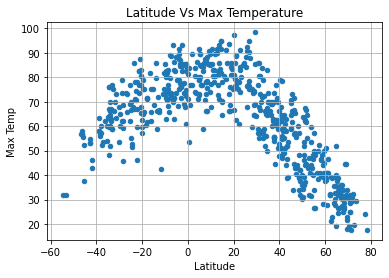

In [32]:
## Latitude Vs Max Temperature plot
#plt.scatter(city_df['Latitude'],city_df['Max Temp'],)
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

# save the figure 
plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

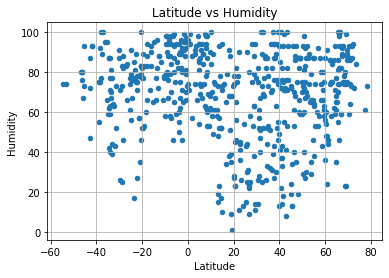

In [33]:
## latitude vs Humidity
city_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True)
# save the figure 
plt.savefig("output_plots/Humidity_vs_Latitude.png")
# Display the plot 
plt.show()

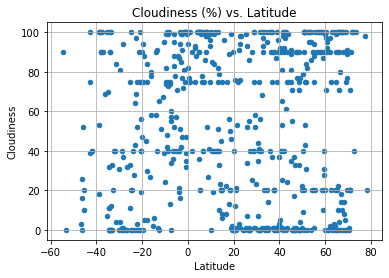

In [34]:
# Cloudiness (%) vs. Latitude
city_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True)

# save the figure 
plt.savefig("output_plots/Cloudiness_vs_Latitude.png")

# Display the plot 
plt.show()

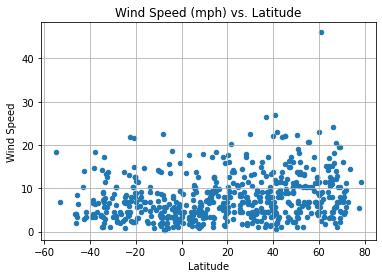

In [35]:
# Wind Speed (mph) vs. Latitude
city_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True) 

# Save the figure
plt.savefig("output_plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [36]:
# save the Dataframe to csv file 
city_df.to_csv(output_data_file,index_label ="city_id")